## Observations and Insights 
* An obvious observation is the breakdown of male versus female subjects. The analysis is almost 50/50. Having an even gender distribution is a good thing for testing drugs as a drug may have different effects on different genders.

* Looking at the box plot, it is clear that Capomulin and Ramicane are the leading regimen options. The final tumor size ranges for these are smaller than that of Infubinol and Ceftamin.

* From running a linear regression on mouse weight versus average tumor volume, we find the r-value is 0.84. An r-value close to one means there is a good correlation between these two parameters. The correlation is seen visually by observing how close the regression line is to the scatter plot points.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata_df, study_results_df, how="inner")

# Display the data table for preview
# html = combine_data_df.head().to_html()
# print(html)
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice_id_count = len(combine_data_df["Mouse ID"].unique())
print(f"Unique Mice Id's: {unique_mice_id_count}")

Unique Mice Id's: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_data_df[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"]
duplicate_mice_df.head()

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_data_df[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]
# html = duplicate_mice_df.head().to_html()
# print(html)
duplicate_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
# html = clean_df.head().to_html()
# print(html)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_id_count = len(clean_df["Mouse ID"].unique())
print(f"Unique Mice Ids: {unique_mice_id_count}")

Unique Mice Ids: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_min_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_min_group = clean_min_df.groupby(["Drug Regimen"])

mean_vol = clean_min_group["Tumor Volume (mm3)"].mean().map("{:.2f}".format)
median_vol = clean_min_group["Tumor Volume (mm3)"].median().map("{:.2f}".format)
mode_vol = clean_min_group["Tumor Volume (mm3)"].apply(lambda x: x.mode().iloc[0]).map("{:.2f}".format)
var_vol = clean_min_group["Tumor Volume (mm3)"].var().map("{:.2f}".format)
std_vol = clean_min_group["Tumor Volume (mm3)"].std().map("{:.2f}".format)
sem_vol = clean_min_group["Tumor Volume (mm3)"].sem().map("{:.2f}".format)

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
                            "Mean": mean_vol,
                            "Median": median_vol,
                            "Mode": mode_vol,
                            "Variance": var_vol,
                            "Standard Deviation": std_vol,
                            "SEM": sem_vol
                         })
# html = summary_df.head().to_html()
# print(html)
summary_df

,Mean,Median,Mode,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.39,50.91,45.00,43.14,6.57,0.53
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_agg_df = clean_min_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', lambda x: x.mode().iloc[0], 'var', 'std', 'sem']})
clean_agg_df.rename(columns={"<lambda_0>": "mode"}, inplace=True)
# clean_agg_df[('Tumor Volume (mm3)', 'mean')] = clean_agg_group[('Tumor Volume (mm3)', 'mean')].map("{:.2f}".format)
# html = clean_agg_df.head().to_html()
# print(html)
clean_agg_df

Tumor Volume (mm3)                                        \
                           mean     median  mode        var       std   
Drug Regimen                                                            
Capomulin             40.675741  41.557809  45.0  24.947764  4.994774   
Ceftamin              52.591172  51.776157  45.0  39.290177  6.268188   
Infubinol             52.884795  51.820584  45.0  43.128684  6.567243   
Ketapril              55.235638  53.698743  45.0  68.553577  8.279709   
Naftisol              54.331565  52.509285  45.0  66.173479  8.134708   
Placebo               54.033581  52.288934  45.0  61.168083  7.821003   
Propriva              52.393463  50.909965  45.0  43.138803  6.568014   
Ramicane              40.216745  40.673236  45.0  23.486704  4.846308   
Stelasyn              54.233149  52.431737  45.0  59.450562  7.710419   
Zoniferol             53.236507  51.818479  45.0  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

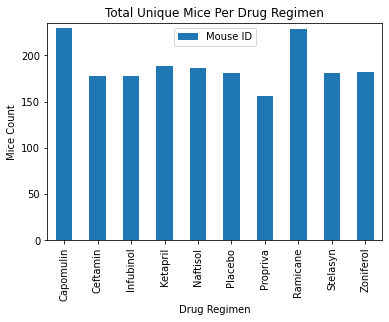

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_min_df = clean_df[["Drug Regimen", "Mouse ID"]]
clean_min_group = clean_min_df.groupby(["Drug Regimen"]).count()
clean_min_group.plot(kind="bar")
plt.ylim((0, 235))
plt.title("Total Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.savefig("./Images/TotalUniqueMiceBar_pandas.png", bbox_inches='tight')
plt.show()

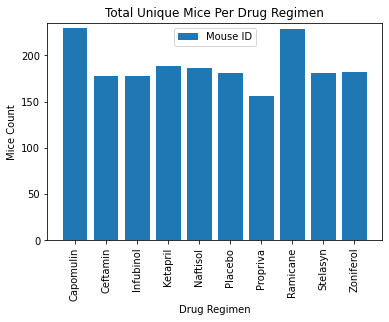

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen_list = clean_min_group.index.values.tolist()
# print(drug_regimen_list)
plt.bar(drug_regimen_list, clean_min_group["Mouse ID"], label="Mouse ID")
plt.ylim((0, 235))
plt.xticks(rotation="vertical")
plt.title("Total Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.legend(loc="best")
plt.savefig("./Images/TotalUniqueMiceBar_pyplot.png", bbox_inches='tight')
plt.show()

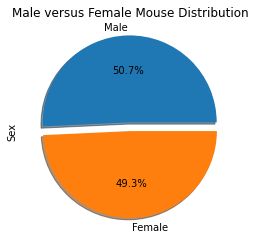

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
explode = [0.1, 0]
gender_count.plot(kind="pie", autopct="%1.1f%%", explode=explode, shadow=True)
plt.title("Male versus Female Mouse Distribution")
plt.savefig("./Images/MalevFemaleDist_pandas.png")
plt.show()

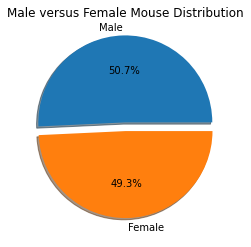

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["tab:blue", "tab:orange"]
explode = [0.1, 0]
genders = gender_count.index.values.tolist()
plt.pie(gender_count, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Male versus Female Mouse Distribution")
plt.savefig("./Images/MalevFemaleDist_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
rami_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infu_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capo_last_group = capo_df.groupby("Mouse ID").max()["Timepoint"]
rami_last_group = rami_df.groupby("Mouse ID").max()["Timepoint"]
infu_last_group = infu_df.groupby("Mouse ID").max()["Timepoint"]
ceft_last_group = ceft_df.groupby("Mouse ID").max()["Timepoint"]
# print(capo_last_group)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_last_df = pd.merge(capo_last_group, clean_df, on=("Mouse ID", "Timepoint"), how='left')
rami_last_df = pd.merge(rami_last_group, clean_df, on=("Mouse ID", "Timepoint"), how='left')
infu_last_df = pd.merge(infu_last_group, clean_df, on=("Mouse ID", "Timepoint"), how='left')
ceft_last_df = pd.merge(ceft_last_group, clean_df, on=("Mouse ID", "Timepoint"), how='left')

# html = capo_last_df.head().to_html()
# print(html)
capo_last_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capo_tumor = capo_last_df["Tumor Volume (mm3)"]
rami_tumor = rami_last_df["Tumor Volume (mm3)"]
infu_tumor = infu_last_df["Tumor Volume (mm3)"]
ceft_tumor = ceft_last_df["Tumor Volume (mm3)"]

# Create list to fill with tumor vol data (for plotting)
tumor_data = [capo_tumor, rami_tumor, infu_tumor, ceft_tumor]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes --> already done
    # add subset --> already done
    # Determine outliers using upper and lower bounds
# Capomulin
capo_quartiles = capo_tumor.quantile([0.25,0.5,0.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq - capo_lowerq
capo_lower_bound = capo_lowerq - (1.5 * capo_iqr)
capo_upper_bound = capo_upperq + (1.5 * capo_iqr)
print(f"Capomulin outliers could be below {capo_lower_bound:.2f} mm3 or above {capo_upper_bound:.2f} mm3")
# Ramicane
rami_quartiles = rami_tumor.quantile([0.25,0.5,0.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq - rami_lowerq
rami_lower_bound = rami_lowerq - (1.5 * rami_iqr)
rami_upper_bound = rami_upperq + (1.5 * rami_iqr)
print(f"Ramicane  outliers could be below {rami_lower_bound:.2f} mm3 or above {rami_upper_bound:.2f} mm3")
# Infubinol
infu_quartiles = infu_tumor.quantile([0.25,0.5,0.75])
infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq - infu_lowerq
infu_lower_bound = infu_lowerq - (1.5 * infu_iqr)
infu_upper_bound = infu_upperq + (1.5 * infu_iqr)
print(f"Infubinol outliers could be below {infu_lower_bound:.2f} mm3 or above {infu_upper_bound:.2f} mm3")
# Ceftamin
ceft_quartiles = ceft_tumor.quantile([0.25,0.5,0.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5 * ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5 * ceft_iqr)
print(f"Ceftamin  outliers could be below {ceft_lower_bound:.2f} mm3 or above {ceft_upper_bound:.2f} mm3")

    

Capomulin outliers could be below 20.70 mm3 or above 51.83 mm3
Ramicane  outliers could be below 17.91 mm3 or above 54.31 mm3
Infubinol outliers could be below 36.83 mm3 or above 82.74 mm3
Ceftamin  outliers could be below 25.36 mm3 or above 87.67 mm3


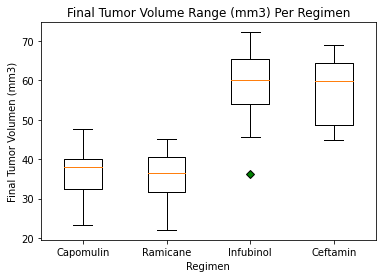

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor="g", marker="D")
plt.subplots()
plt.title("Final Tumor Volume Range (mm3) Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volumen (mm3)")
plt.boxplot(tumor_data, labels = labels, flierprops=green_diamond)
plt.savefig("./Images/TumorVolumeRange_pyplot.png")
plt.show()

## Line and Scatter Plots

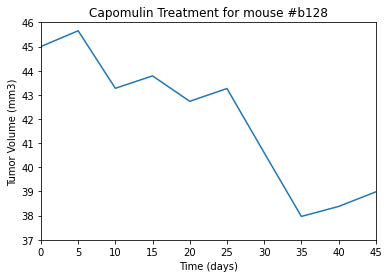

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "b128"
b128_df = capo_df.loc[capo_df["Mouse ID"] == mouse_id, :]
x_axis = b128_df["Timepoint"]
y_axis = b128_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlim((0, 45))
plt.ylim((37,46))
plt.title(f"Capomulin Treatment for mouse #{mouse_id}")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("./Images/TumorVolumeLine_pyplot.png")
plt.show()

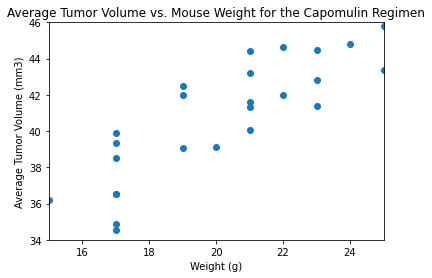

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_average_tumor_vol = capo_df.groupby(["Mouse ID"]).mean()
x_axis = capo_average_tumor_vol["Weight (g)"]
y_axis = capo_average_tumor_vol["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlim((15, 25))
plt.ylim((34, 46))
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("./Images/TumorVolumeScatter_pyplot.png")
plt.show()


## Correlation and Regression

Linear Regression: slope=0.95, y-intercept=21.55, r-value=0.84, p-value=0.00, stderr=0.13


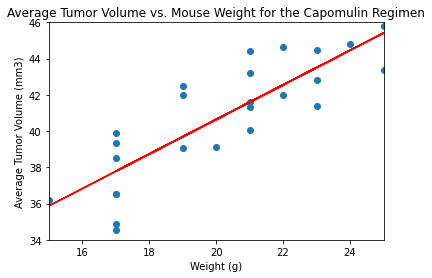

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"Linear Regression: slope={slope:.2f}, y-intercept={intercept:.2f}, r-value={rvalue:.2f}, p-value={pvalue:.2f}, stderr={stderr:.2f}")
regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis)
plt.xlim((15, 25))
plt.ylim((34, 46))
plt.plot(x_axis, regress_values, "r-")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("./Images/TumorVolumeScatterRegress_pyplot.png")
plt.show()